In [2]:
## Iporting the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import linear_model,metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Importing the dataset

In [4]:
## Heart failure data set available from Kaggle website
data=pd.read_csv("heart_failure_clinical_records_dataset.csv",encoding='latin-1')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
## Total rows and columns in the dataset
nrow=len(data)
ncol=len(data.columns)
print(f"The data consists of {nrow} rows and {ncol} columns.")

The data consists of 299 rows and 13 columns.


In [19]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Exploratory Data Analysis

In [20]:
## Finding the data points for people who died because of heart failure which would be used for data exploration
df_hist=data[data['DEATH_EVENT']==1]
df_hist.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


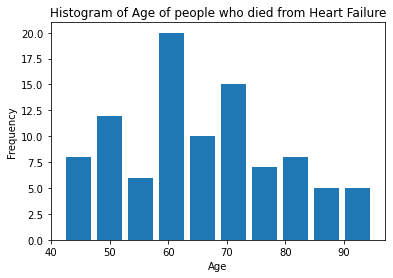

In [21]:
## Plotting the histogram for the variable age of people who died because of heart failure 
plt.hist(df_hist.age.values,bins=10,rwidth=0.8, align='mid')
plt.title("Histogram of Age of people who died from Heart Failure")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

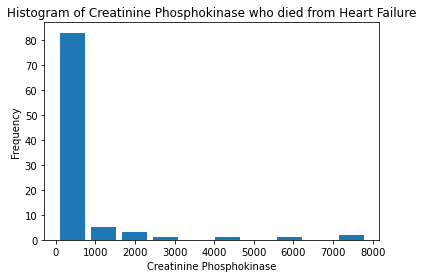

In [22]:
## Plotting the histogram for the variable Creatinine Phosphokinase of people who died because of heart failure 
plt.hist(df_hist.creatinine_phosphokinase.values,bins=10,rwidth=0.8, align='mid')
plt.title("Histogram of Creatinine Phosphokinase who died from Heart Failure")
plt.xlabel("Creatinine Phosphokinase")
plt.ylabel("Frequency")
plt.show()

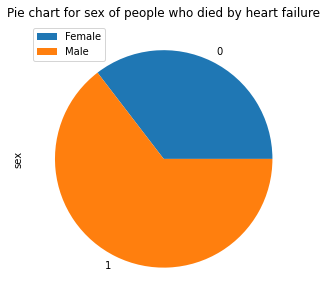

In [23]:
## Plotting the pie chart for the variable sex of people who died because of heart failure 
plt.subplots(figsize=(5,5))
df_hist.groupby('sex')['sex'].count().plot.pie()
plt.title("Pie chart for sex of people who died by heart failure")
plt.legend(['Female','Male'],loc='upper left')
plt.show()

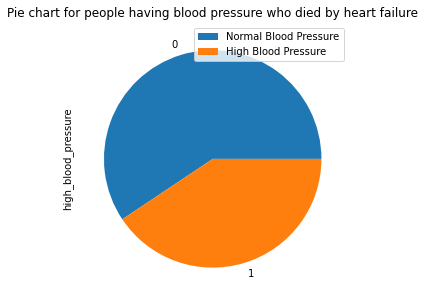

In [24]:
## Plotting the pie chart for the variable high blood pressure of people who died because of heart failure 
plt.subplots(figsize=(5,5))
df_hist.groupby('high_blood_pressure')['high_blood_pressure'].count().plot.pie()
plt.title("Pie chart for people having blood pressure who died by heart failure")
plt.legend(['Normal Blood Pressure','High Blood Pressure'],loc='upper right')
plt.show()

'red'=People who did not die because of heart failure, 'blue'=People who died of heart failure


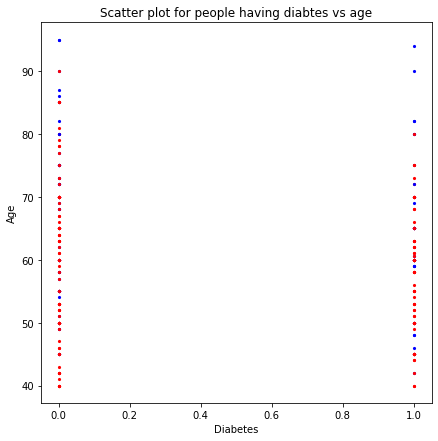

In [25]:
## Scatter plot for diabetes vs age and the colors in the plot indicate whether the person died of heart failure or not  
plt.subplots(figsize=(7,7))
## Append colours for differentiating people who either died or not die because of heart failure
col=[]
for i in range(0,len(data)):
    if data.DEATH_EVENT[i]==0:
        col.append('r') 
    else: 
        col.append('b') 
#scatter plot for people having diabetes
for i in range(len(data)):
    plt.scatter(data.diabetes[i],data.age[i],c=col[i],s=10, linewidth=0)
print("'red'=People who did not die because of heart failure, 'blue'=People who died of heart failure")
plt.title("Scatter plot for people having diabtes vs age")
plt.xlabel("Diabetes")
plt.ylabel("Age")
plt.show()

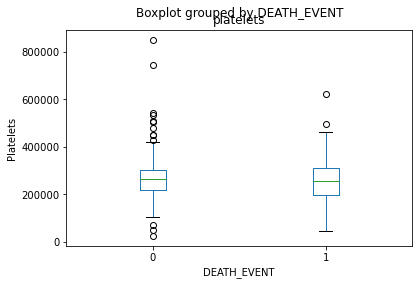

In [26]:
## Boxplot for the variable platelets and differentiated by whether the person died of heart failure or not
data.boxplot(column='platelets', by='DEATH_EVENT',grid=False) 
plt.ylabel("Platelets")
plt.show()

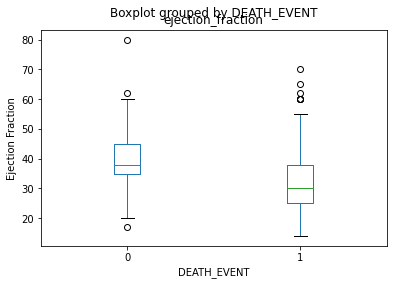

In [27]:
## Boxplot for the variable ejection fraction and differentiated by whether the person died of heart failure or not
data.boxplot(column='ejection_fraction', by='DEATH_EVENT',grid=False) 
plt.ylabel("Ejection Fraction")
plt.show()

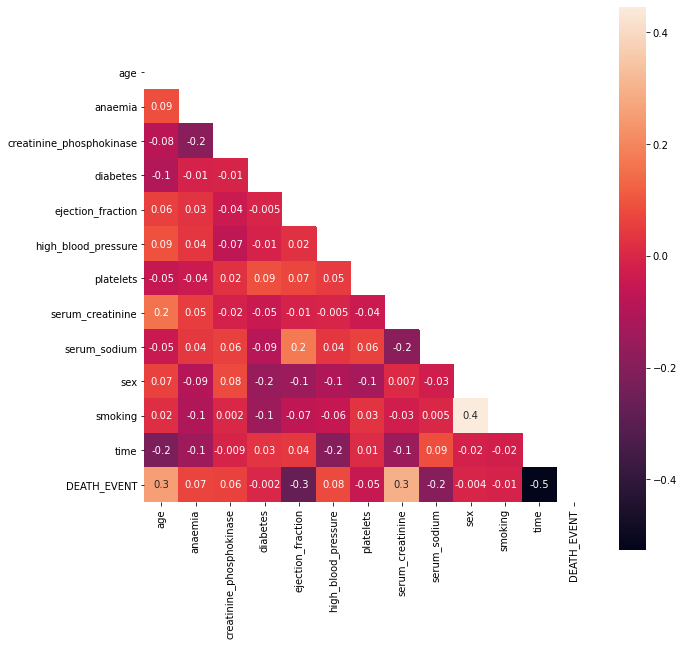

In [28]:
## Correlation plot for finding the correlation between variables
corrMatrix = data.corr()
matrix = np.triu(data.corr()) ## To display only the lower half of the matrix
plt.subplots(figsize=(10,10))
sn.heatmap(corrMatrix, fmt='.1g', annot=True,square=True,mask=matrix) ## To plot the correlation matrix as heatmap usingh seaborn library
plt.show()

## Predictive Models

In [6]:
## Divide the data into test and train data set
x=data[data.columns[0:len(data.columns)-1]]
y=data['DEATH_EVENT'] ## reponse variable is death event in this case
## Using 75% of the data as train data and remianing 25% as test data set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=154)

### Linear Regression

In [30]:
## Building a linear regression model for the heart failure dataset
lin_model = linear_model.LinearRegression()
## Fitting the model on the train data set
lin_model.fit(X_train,y_train)
## Using the test data for predicting using the linear model
y_pred=lin_model.predict(X_test)
## Obtaining mean squared error
mse=metrics.mean_squared_error(y_test,y_pred)
print(lin_model)
print('Intercept:',lin_model.intercept_)
print('Coefficients:\n',lin_model.coef_)
print('R sq: ',lin_model.score(X_train,y_train))
print("The test MSE for the linear model on the heart failure data is:", round(mse,4))

LinearRegression()
Intercept: 1.4958860361943718
Coefficients:
 [ 4.79196356e-03  1.24206279e-02  3.97005232e-05  1.15127945e-01
 -1.02089518e-02  2.18097661e-02 -7.94914440e-09  8.61532714e-02
 -6.34259368e-03 -4.66989326e-02 -2.35749574e-02 -2.94940202e-03]
R sq:  0.47239560572402517
The test MSE for the linear model on the heart failure data is: 0.1738


### Logistics Regression

In [31]:
## Building a logistics regression model on the heart failure data set
log_model = linear_model.LogisticRegression()
## Fitting the logistics model on the train data set
log_model.fit(X_train,y_train)
## Using the fitted model for predicting the valus of test data set
y_pred=log_model.predict(X_test)
## Obatining the mean squared error for the predictions done using the logistics model
mse=metrics.mean_squared_error(y_test,y_pred)
print("The test MSE for the logistics regression model on the heart failure data is:", round(mse,2))
print("The confusion matrix for the logistics regression is:")
## Obtaining the confusion matrix to observe the false positive and false neagtive values for the predictions 
print(confusion_matrix(y_test, y_pred))
## Printing the classification report for the model
print(classification_report(y_test, y_pred))

The test MSE for the logistics regression model on the heart failure data is: 0.2
The confusion matrix for the logistics regression is:
[[45  7]
 [ 8 15]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        52
           1       0.68      0.65      0.67        23

    accuracy                           0.80        75
   macro avg       0.77      0.76      0.76        75
weighted avg       0.80      0.80      0.80        75



### KNN Classification

In [32]:
## Building a KNN classification model on the heart failure data set
classifier = KNeighborsClassifier(n_neighbors=2)
## Fitting the KNN classification model on the train data set
classifier.fit(X_train, y_train)
## Using the fitted model for predicting the valus of test data set
y_pred = classifier.predict(X_test)
## Obatining the mean squared error for the predictions done using the KNN classification
mse=metrics.mean_squared_error(y_test,y_pred)
print("The test MSE for the KNN Classification model on the heart failure data is:", round(mse,2))
print('The confusion matrix for the KNN Classification is:')
## Obtaining the confusion matrix to observe the false positive and false neagtive values for the predictions 
print(confusion_matrix(y_test, y_pred))
## Printing the classification report for the model
print(classification_report(y_test, y_pred))

The test MSE for the KNN Classification model on the heart failure data is: 0.29
The confusion matrix for the KNN Classification is:
[[49  3]
 [19  4]]
              precision    recall  f1-score   support

           0       0.72      0.94      0.82        52
           1       0.57      0.17      0.27        23

    accuracy                           0.71        75
   macro avg       0.65      0.56      0.54        75
weighted avg       0.67      0.71      0.65        75



### SVM Classification

##### Linear Kernel

In [7]:
## Building a SVM classification model on the heart failure data set
svclassifier = SVC(kernel='linear')
## Fitting the SVM classification model on the train data set
svclassifier.fit(X_train, y_train)
## Using the fitted model for predicting the valus of test data set
y_pred = svclassifier.predict(X_test)
## Obatining the mean squared error for the predictions done using the SVM classification
mse=metrics.mean_squared_error(y_test,y_pred)
print("The test MSE for the KNN Classification model on the heart failure data is:", round(mse,2))
## Obtaining the confusion matrix to observe the false positive and false neagtive values for the predictions 
print('The confusion matrix for the KNN Classification is:')
print(confusion_matrix(y_test,y_pred))
## Printing the classification report for the model
print(classification_report(y_test,y_pred))

The test MSE for the KNN Classification model on the heart failure data is: 0.21
The confusion matrix for the KNN Classification is:
[[47  5]
 [11 12]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        52
           1       0.71      0.52      0.60        23

    accuracy                           0.79        75
   macro avg       0.76      0.71      0.73        75
weighted avg       0.78      0.79      0.78        75



#### Sigmoid Kernel

In [38]:
## Building a SVM classification model with sigmoid kernel on the heart failure data set 
svclassifier = SVC(kernel='sigmoid')
## Fitting the SVM classification model on the train data set
svclassifier.fit(X_train, y_train)
## Using the fitted model for predicting the valus of test data set
y_pred = svclassifier.predict(X_test)
## Obatining the mean squared error for the predictions done using the SVM classification
mse=metrics.mean_squared_error(y_test,y_pred)
print("The test MSE for the KNN Classification model on the heart failure data is:", round(mse,2))
print('The confusion matrix for the KNN Classification is:')
## Obtaining the confusion matrix to observe the false positive and false neagtive values for the predictions 
print(confusion_matrix(y_test,y_pred))
## Printing the classification report for the model
print(classification_report(y_test,y_pred))

The test MSE for the KNN Classification model on the heart failure data is: 0.36
The confusion matrix for the KNN Classification is:
[[42 10]
 [17  6]]
              precision    recall  f1-score   support

           0       0.71      0.81      0.76        52
           1       0.38      0.26      0.31        23

    accuracy                           0.64        75
   macro avg       0.54      0.53      0.53        75
weighted avg       0.61      0.64      0.62        75

